#### Databricks Notebook source
##### We use Databricks community edition from https://community.cloud.databricks.com/login.html

##### Listing files

In [ ]:
%fs ls dbfs:/FileStore/

path,name,size,modificationTime
dbfs:/FileStore/Linux_Projects.txt,Linux_Projects.txt,1311,1709237028000
dbfs:/FileStore/import-stage/,import-stage/,0,0
dbfs:/FileStore/penguin.csv,penguin.csv,9876,1709401238000
dbfs:/FileStore/plots/,plots/,0,0
dbfs:/FileStore/products.csv,products.csv,14667,1709407892000
dbfs:/FileStore/shared_uploads/,shared_uploads/,0,0
dbfs:/FileStore/tables/,tables/,0,0


##### Copying files from FileStore to /mnt/test-0224

In [ ]:
%fs cp dbfs:/FileStore/products.csv  dbfs:/mnt/test-0224/

res1: Boolean = true

In [ ]:
%fs ls dbfs:/mnt/test-0224/

path,name,size,modificationTime
dbfs:/mnt/test-0224/penguin.csv,penguin.csv,9876,1709401877000
dbfs:/mnt/test-0224/products.csv,products.csv,14667,1709424324000


In [ ]:
datasets_dir = "dbfs:/mnt/test-0224/"

##### List the header

In [ ]:
products_csv_file_path = f"{datasets_dir}/products.csv"
print(dbutils.fs.head(products_csv_file_path))

ProductID,ProductName,Category,ListPrice
771,"Mountain-100 Silver, 38",Mountain Bikes,3399.9900
772,"Mountain-100 Silver, 42",Mountain Bikes,3399.9900
773,"Mountain-100 Silver, 44",Mountain Bikes,3399.9900
774,"Mountain-100 Silver, 48",Mountain Bikes,3399.9900
775,"Mountain-100 Black, 38",Mountain Bikes,3374.9900
776,"Mountain-100 Black, 42",Mountain Bikes,3374.9900
777,"Mountain-100 Black, 44",Mountain Bikes,3374.9900
778,"Mountain-100 Black, 48",Mountain Bikes,3374.9900
779,"Mountain-200 Silver, 38",Mountain Bikes,2319.9900
780,"Mountain-200 Silver, 42",Mountain Bikes,2319.9900
781,"Mountain-200 Silver, 46",Mountain Bikes,2319.9900
782,"Mountain-200 Black, 38",Mountain Bikes,2294.9900
783,"Mountain-200 Black, 42",Mountain Bikes,2294.9900
784,"Mountain-200 Black, 46",Mountain Bikes,2294.9900
785,"Mountain-300 Black, 38",Mountain Bikes,1079.9900
786,"Mountain-300 Black, 40",Mountain Bikes,1079.9900
787,"Mountain-300 Black, 44",Mountain Bikes,1079.9900
788,"Mountain-300 Black, 48",Mount

##### Query data in files

In [ ]:
products_csv_path = f"{datasets_dir}/products.csv"
products_df = (spark
               .read
               .option("header", True)
               .option("inferSchema", True)
               .csv(products_csv_path)
              )


In [ ]:
##### Displaying the schema

In [ ]:
products_df.printSchema()

root
 |-- ProductID: integer (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- ListPrice: double (nullable = true)



In [ ]:
display(products_df)

ProductID,ProductName,Category,ListPrice
771,"Mountain-100 Silver, 38",Mountain Bikes,3399.99
772,"Mountain-100 Silver, 42",Mountain Bikes,3399.99
773,"Mountain-100 Silver, 44",Mountain Bikes,3399.99
774,"Mountain-100 Silver, 48",Mountain Bikes,3399.99
775,"Mountain-100 Black, 38",Mountain Bikes,3374.99
776,"Mountain-100 Black, 42",Mountain Bikes,3374.99
777,"Mountain-100 Black, 44",Mountain Bikes,3374.99
778,"Mountain-100 Black, 48",Mountain Bikes,3374.99
779,"Mountain-200 Silver, 38",Mountain Bikes,2319.99
780,"Mountain-200 Silver, 42",Mountain Bikes,2319.99


##### Filter a DataFrame

In [ ]:
products = products_df['ProductID', 'ProductName', 'Category']
print(products.count())
print(products.distinct().count())
display(products.distinct())

295
295


ProductID,ProductName,Category
959,"Touring-3000 Blue, 58",Touring Bikes
781,"Mountain-200 Silver, 46",Mountain Bikes
870,Water Bottle - 30 oz.,Bottles and Cages
899,"LL Touring Frame - Yellow, 44",Touring Frames
869,"Women's Mountain Shorts, L",Shorts
752,"Road-150 Red, 52",Road Bikes
723,"LL Road Frame - Black, 60",Road Frames
895,"LL Touring Frame - Blue, 50",Touring Frames
901,"LL Touring Frame - Yellow, 54",Touring Frames
868,"Women's Mountain Shorts, M",Shorts


In [ ]:
products_df1 = products_df.select("ProductID", "ProductName", "Category").where(products_df["ProductName"]=="Men's Bib-Shorts, L")
display(products_df1)

ProductID,ProductName,Category
857,"Men's Bib-Shorts, L",Bib-Shorts


In [ ]:
products_df1 = products_df.select("ProductID", "ProductName", "Category").where(products_df["Category"] == "Wheels")
display(products_df1.count())

14

In [ ]:
products_df1 = products_df.select("ProductID", "ProductName", "Category").where(products_df["Category"] == "Wheels")
display(products_df.distinct().count())

295

In [ ]:
products_df1 = products_df.select("ProductID", "ProductName", "Category").where(products_df["Category"] == "Wheels")
display(products_df.distinct())

ProductID,ProductName,Category,ListPrice
883,"Short-Sleeve Classic Jersey, L",Jerseys,53.99
944,"LL Mountain Frame - Silver, 40",Mountain Frames,264.05
721,"HL Road Frame - Red, 56",Road Frames,1431.5
746,"HL Mountain Frame - Black, 46",Mountain Frames,1349.6
886,"LL Touring Frame - Yellow, 62",Touring Frames,333.42
972,"Touring-2000 Blue, 54",Touring Bikes,1214.85
811,LL Road Handlebars,Handlebars,44.54
994,LL Bottom Bracket,Bottom Brackets,53.99
729,"LL Road Frame - Red, 60",Road Frames,337.22
710,"Mountain Bike Socks, L",Socks,9.5


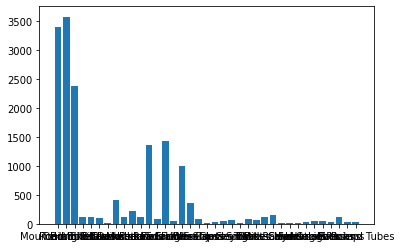

In [ ]:
from matplotlib import pyplot as plt
    
# matplotlib requires a Pandas DataFrame
df_category = products_df.toPandas()
# Create a bar plot of Category by List price
plt.bar(x=df_category["Category"], height=df_category["ListPrice"])
# Display the plot
plt.show()